# Telco Customer Churn
##### Focused customer retention programs - Predict Customers behavior to retain customers

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, and if they have partners and dependents
- Tenure: Job tenure refers to the length of time an employee has worked for their current employer

### Data Exploration

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Quick overview of the dataset.
- There are 7043 rows and 21 columns in the dataset
- " Total Charges" need to be converted from categorical feature to be numeric feature
- "Senior Citizen" need to be converted from numerical feature to be categorical feature
- No Outliers or Missing Values in the dataset
- Churn is the target variable
- ANN may be used for training the model as it is a classification problem and there is no obvious relation between Churn and other features so ANN will be used for classification and feature extraction

### Data Preprocessing

In [7]:
df.drop('customerID', axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.rename(columns={'gender':'Gender', 'tenure':'Tenure'}, inplace=True)
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
# Convert TotalCharges from object to float
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [10]:
df['TotalCharges'].loc[488]

' '

In [11]:
df['TotalCharges'].str.isspace().sum()

11

In [12]:
# Find spaces or empty strings in TotalCharges column
df[df['TotalCharges'].str.isspace()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[df['TotalCharges'].str.isspace()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
# Drop the blank values
df.drop(df[df['TotalCharges'].str.isspace()].index, axis=0, inplace=True)

In [15]:
df.shape

(7032, 20)

In [16]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
# Convert TotalCharges from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [18]:
df['TotalCharges'].dtype

dtype('float64')

In [19]:
for col in df.columns:
    print(col, ':', df[col].value_counts(), '\n')

Gender : Male      3549
Female    3483
Name: Gender, dtype: int64 

SeniorCitizen : 0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Partner : No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents : No     4933
Yes    2099
Name: Dependents, dtype: int64 

Tenure : 1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: Tenure, Length: 72, dtype: int64 

PhoneService : Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines : No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService : Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity : No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup : No                     3087
Yes                    2425
No internet service    1520
Name: Online

### Exploratory Data Analysis

In [20]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)

SeniorCitizen
Tenure
MonthlyCharges
TotalCharges


<Axes: xlabel='TotalCharges', ylabel='Count'>

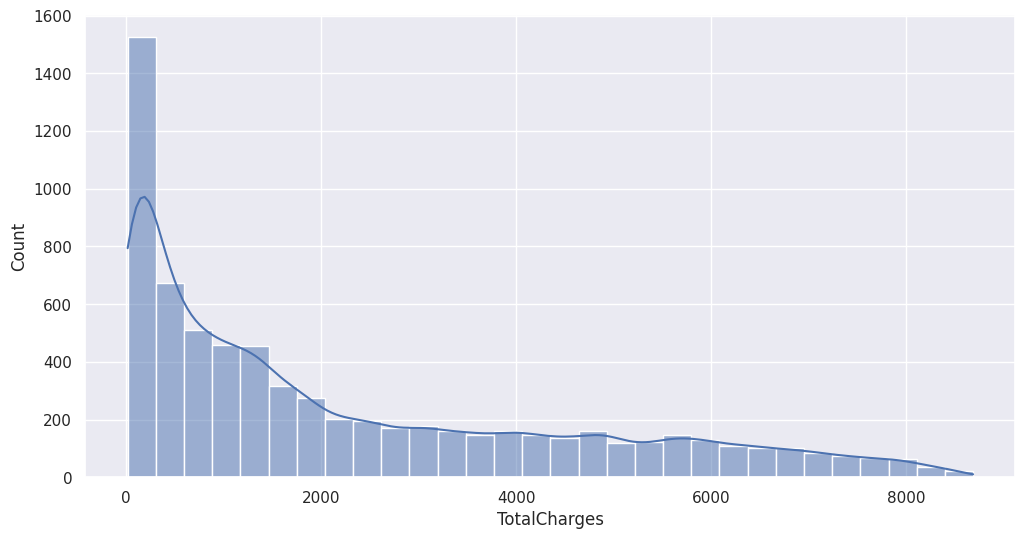

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True, kde_kws={'bw_adjust': 0.5})

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

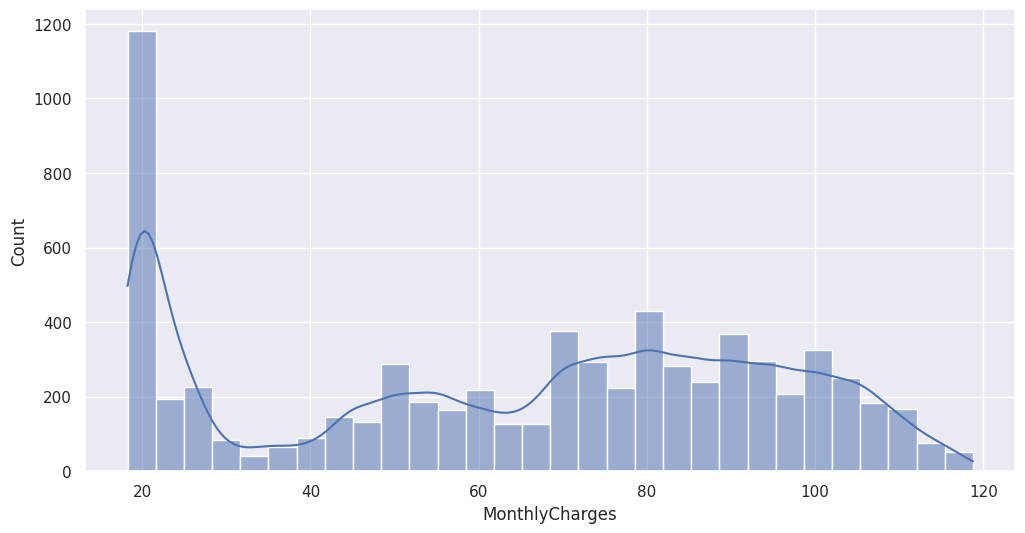

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True, kde_kws={'bw_adjust': 0.5})

<Axes: xlabel='Churn', ylabel='count'>

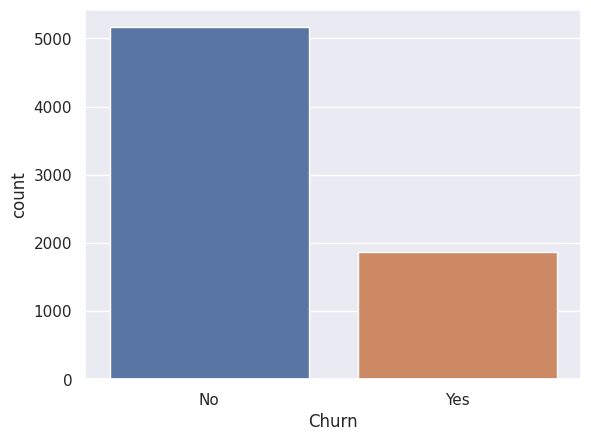

In [23]:
sns.countplot(data=df, x='Churn', hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

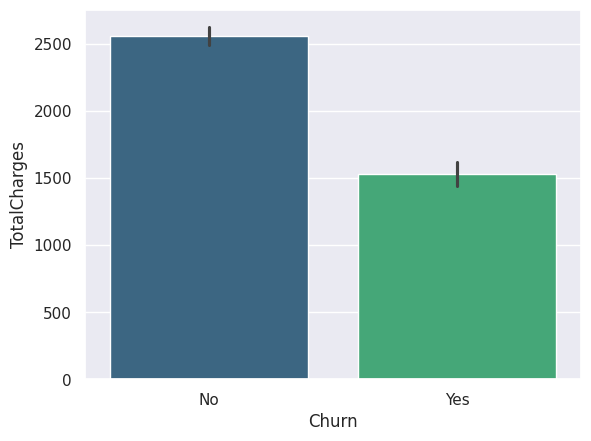

In [24]:
sns.barplot(data=df, x='Churn', y='TotalCharges', palette='viridis', hue='Churn')

<Axes: xlabel='Churn', ylabel='Tenure'>

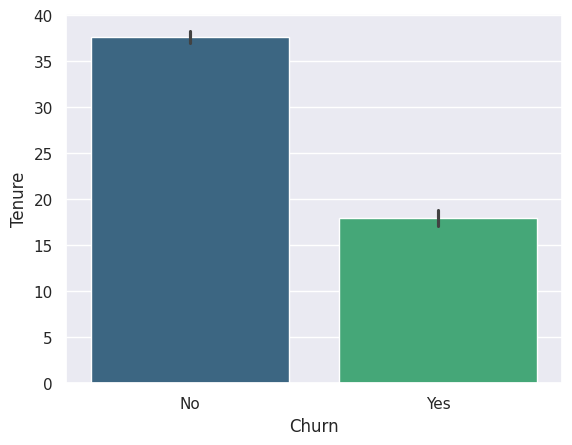

In [25]:
sns.barplot(data=df, x='Churn', y='Tenure', palette='viridis', hue='Churn')

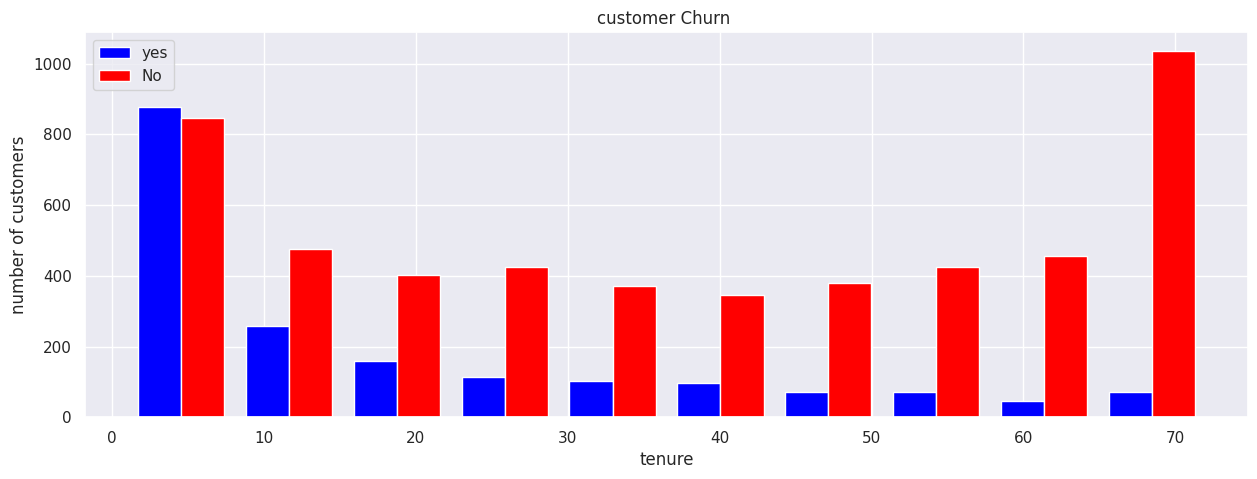

In [26]:
plt.figure(figsize=(15,5))

tenure_no = df[df.Churn=='No'].Tenure
tenure_yes = df[df.Churn=='Yes'].Tenure
plt.hist([tenure_yes,tenure_no],color=['blue','red'],label=["yes",'No'])
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('customer Churn ')
plt.legend()
plt.show()

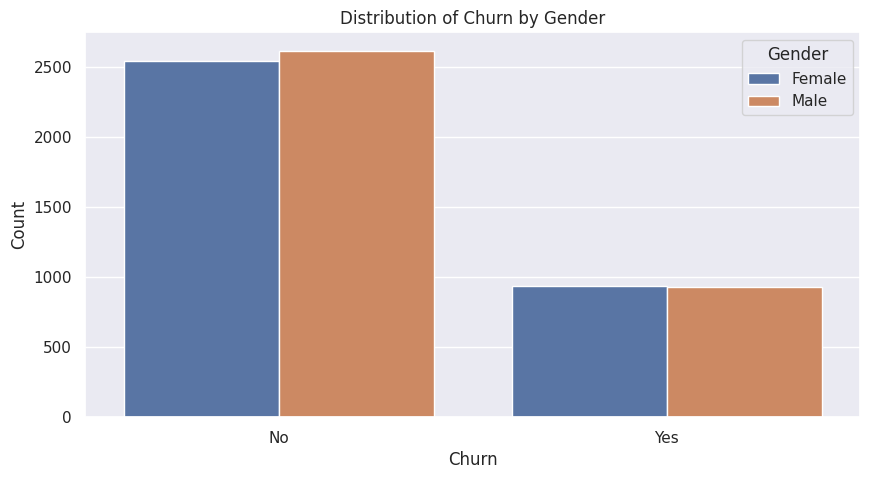

In [27]:
# Distrubution of churn by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn', hue='Gender')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn by Gender')
plt.show()

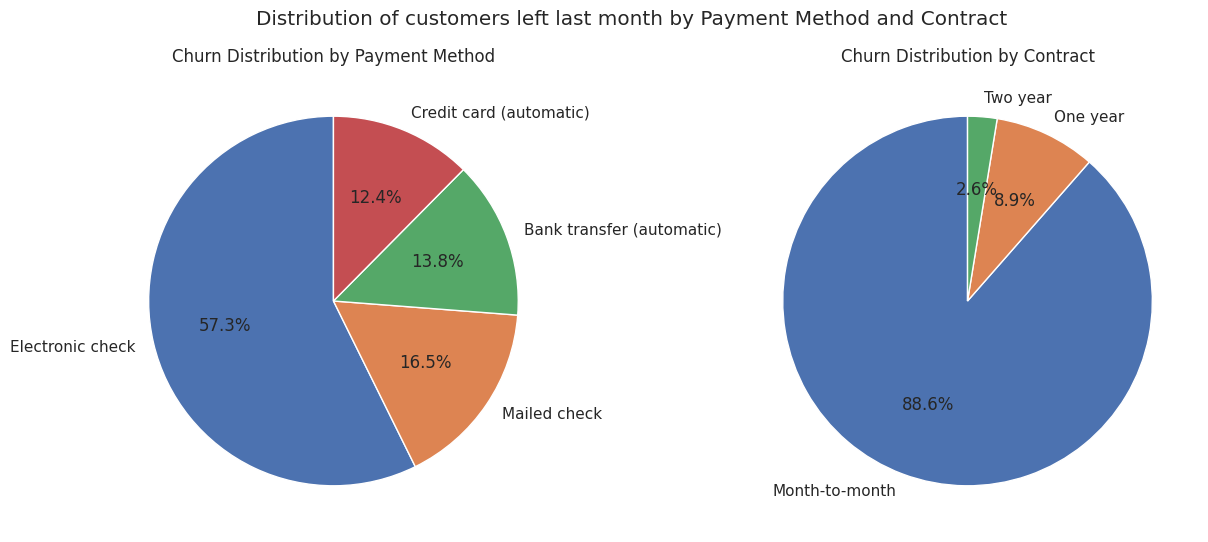

In [28]:
# Using Subplots - Pie chart for churn with paymentMethod and contract
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Distribution of customers left last month by Payment Method and Contract')

# Pie chart for churn by paymentMethod
df_churn_payment = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
labels_payment = df_churn_payment.index
sizes_payment = df_churn_payment.values
axes[0].pie(sizes_payment, labels=labels_payment, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Churn Distribution by Payment Method')

# Pie chart for churn by contract
df_churn_contract = df[df['Churn'] == 'Yes']['Contract'].value_counts()
labels_contract = df_churn_contract.index
sizes_contract = df_churn_contract.values
axes[1].pie(sizes_contract, labels=labels_contract, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Churn Distribution by Contract')

plt.show()

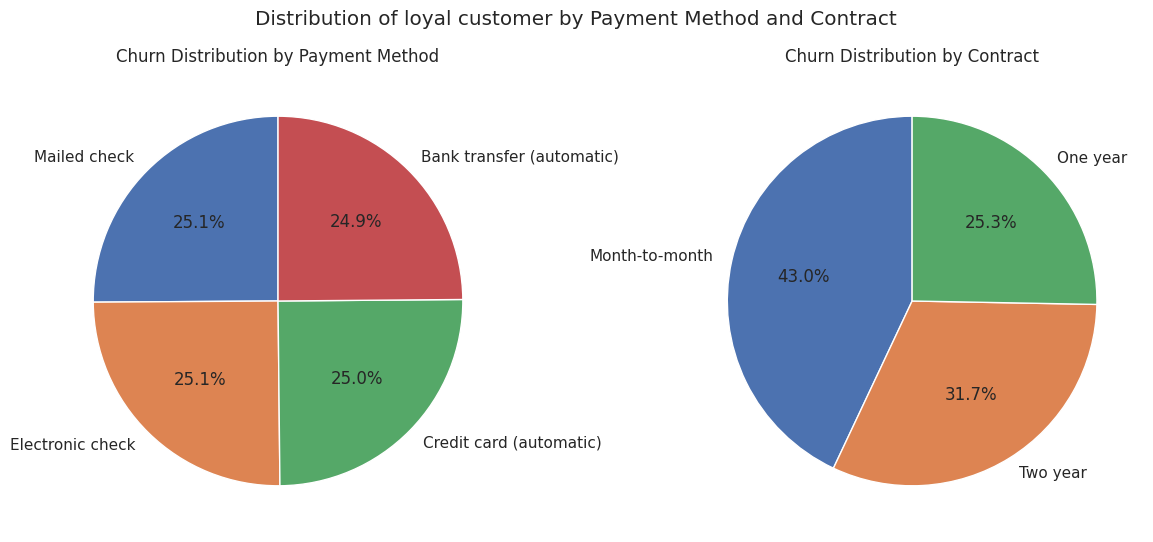

In [29]:
# Using Subplots - Pie chart for churn with paymentMethod and contract
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Distribution of loyal customer by Payment Method and Contract')

# Pie chart for churn by paymentMethod
df_churn_payment = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
labels_payment = df_churn_payment.index
sizes_payment = df_churn_payment.values
axes[0].pie(sizes_payment, labels=labels_payment, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Churn Distribution by Payment Method')

# Pie chart for churn by contract
df_churn_contract = df[df['Churn'] == 'No']['Contract'].value_counts()
labels_contract = df_churn_contract.index
sizes_contract = df_churn_contract.values
axes[1].pie(sizes_contract, labels=labels_contract, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Churn Distribution by Contract')

plt.show()

### Feature Engineering

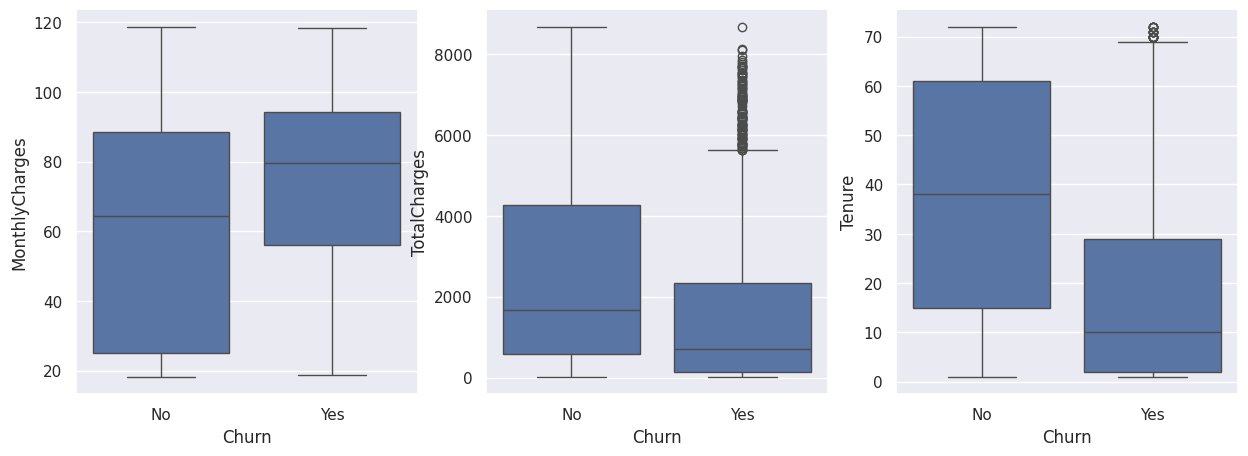

In [30]:
# Boxplot for each numerical feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[0])
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=axes[1])
sns.boxplot(data=df, x='Churn', y='Tenure', ax=axes[2])
plt.show()

<Axes: xlabel='Churn', ylabel='TotalCharges'>

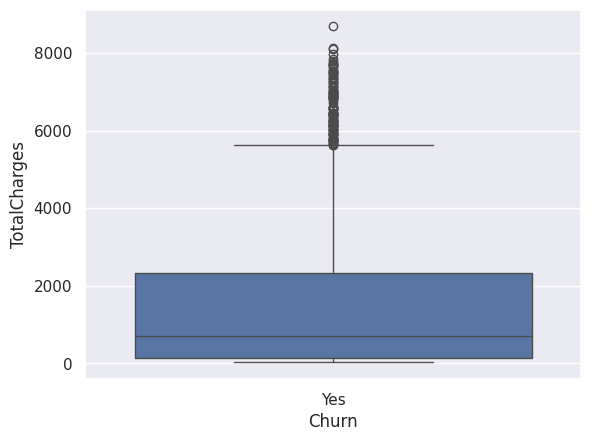

In [31]:
sns.boxplot(data=df[df['Churn'] == 'Yes'], x='Churn', y='TotalCharges')

In [32]:

df[df['Churn'] == 'Yes']['TotalCharges'].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [33]:

df[df['Churn'] == 'Yes']['TotalCharges'].describe()['75%']

2331.3

In [34]:
iqr = df[df['Churn'] == 'Yes']['TotalCharges'].describe()['75%'] - df[df['Churn'] == 'Yes']['TotalCharges'].describe()['25%']
lower_bound = df[df['Churn'] == 'Yes']['TotalCharges'].describe()['25%'] - 1.5 * iqr
upper_bound = df[df['Churn'] == 'Yes']['TotalCharges'].describe()['75%'] + 1.5 * iqr

# Outlier values for totalcharges W.R.T churn (yes)
df[(df['Churn'] == 'Yes') & ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound))]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
339,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603.00,Yes
402,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,Yes
445,Female,0,No,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45,Yes
609,Female,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),105.25,6786.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
6853,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes
6945,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,Yes
6972,Female,1,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.90,Yes


In [35]:
df[(df['Churn'] == 'Yes') & ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound))].shape

# 109 records => no significant effect

(109, 20)

#### Label Encoding

In [36]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, ':', df[col].unique(), '\n')

Gender : ['Female' 'Male'] 

Partner : ['Yes' 'No'] 

Dependents : ['No' 'Yes'] 

PhoneService : ['No' 'Yes'] 

MultipleLines : ['No phone service' 'No' 'Yes'] 

InternetService : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : ['No' 'Yes' 'No internet service'] 

OnlineBackup : ['Yes' 'No' 'No internet service'] 

DeviceProtection : ['No' 'Yes' 'No internet service'] 

TechSupport : ['No' 'Yes' 'No internet service'] 

StreamingTV : ['No' 'Yes' 'No internet service'] 

StreamingMovies : ['No' 'Yes' 'No internet service'] 

Contract : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : ['Yes' 'No'] 

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn : ['No' 'Yes'] 



In [37]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, ':', df[col].unique(), '\n')

Gender : ['Female' 'Male'] 

Partner : ['Yes' 'No'] 

Dependents : ['No' 'Yes'] 

PhoneService : ['No' 'Yes'] 

MultipleLines : ['No' 'Yes'] 

InternetService : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : ['No' 'Yes'] 

OnlineBackup : ['Yes' 'No'] 

DeviceProtection : ['No' 'Yes'] 

TechSupport : ['No' 'Yes'] 

StreamingTV : ['No' 'Yes'] 

StreamingMovies : ['No' 'Yes'] 

Contract : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : ['Yes' 'No'] 

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn : ['No' 'Yes'] 



In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [40]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Standardization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for col in cols_to_scale:
    df[col] = scaler.fit_transform(df[[col]])

In [42]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,0,0,0,1,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,1,0,1,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,1,1,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,0,0,1,0,1,1,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


#### Splitting the dataset into train and test

In [43]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6328, 19) (704, 19) (6328,) (704,)


### Model Building and Training

The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

In [54]:
## Part 2 - Create the Artificial Neural Network (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout


In [55]:
## Initialize the ANN
classifier = Sequential()

In [56]:
## Adding the Layers

### Adding the input layer
classifier.add(Dense(units = 19, activation='relu'))

### Adding the first hidden layer
classifier.add(Dense(units = 12, activation='relu'))

### Adding the second hidden layer
classifier.add(Dense(units = 8, activation='relu'))

### Adding the third hidden layer
classifier.add(Dense(units = 5, activation='relu'))

### Adding the fourth hidden layer
classifier.add(Dense(units = 3, activation='relu'))

### Adding the output layer
classifier.add(Dense(units = 1, activation='sigmoid'))

In [57]:
## Training the ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [58]:
## Early Stopping [Stop training when a monitored metric has stopped improving]
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [59]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
424/424 [==============================] - 4s 5ms/step - loss: 0.6576 - accuracy: 0.7289 - val_loss: 0.6236 - val_accuracy: 0.7492
Epoch 2/1000
424/424 [==============================] - 2s 5ms/step - loss: 0.5854 - accuracy: 0.7792 - val_loss: 0.5514 - val_accuracy: 0.7922
Epoch 3/1000
424/424 [==============================] - 2s 5ms/step - loss: 0.5336 - accuracy: 0.7900 - val_loss: 0.5118 - val_accuracy: 0.8018
Epoch 4/1000
424/424 [==============================] - 2s 6ms/step - loss: 0.5036 - accuracy: 0.7995 - val_loss: 0.4913 - val_accuracy: 0.7985
Epoch 5/1000
424/424 [==============================] - 3s 7ms/step - loss: 0.4825 - accuracy: 0.8011 - val_loss: 0.4723 - val_accuracy: 0.8009
Epoch 6/1000
424/424 [==============================] - 2s 5ms/step - loss: 0.4673 - accuracy: 0.8066 - val_loss: 0.4611 - val_accuracy: 0.8028
Epoch 7/1000
424/424 [==============================] - 2s 5ms/step - loss: 0.4565 - accuracy: 0.8037 - val_loss: 0.4499 - val_accuracy:

In [60]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

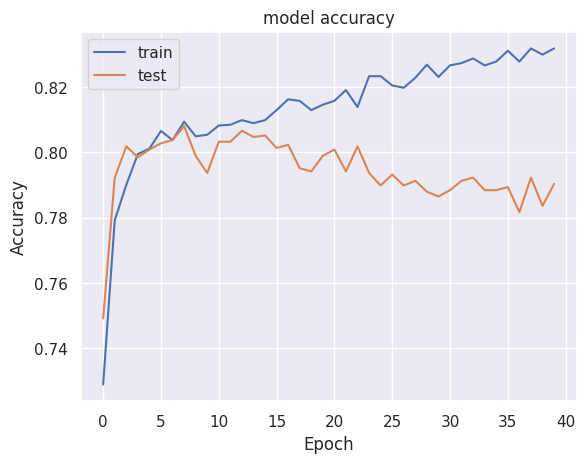

In [61]:
# Summarizing history for accuracy

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()


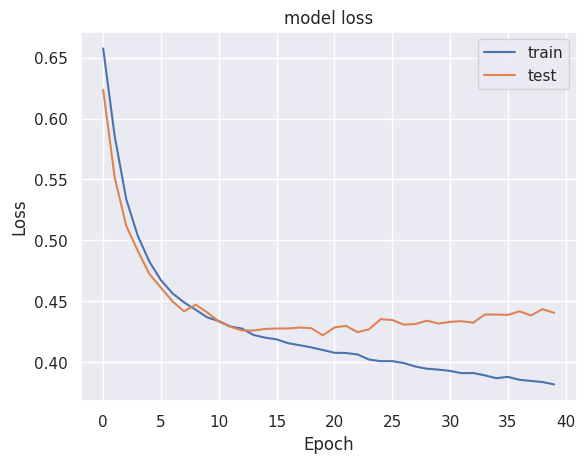

In [62]:
# Summarizing history for loss

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()


#### Model Prediction

In [68]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

22/22 [==============================] - 0s 6ms/step


In [69]:
## Make the confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[454  57]
 [ 98  95]]


In [70]:
## Calculating the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7798295454545454


### Deployment

In [ ]:
# Deploy the model
from sklearn.externals import joblib
joblib.dump(classifier, 'TelcoCustomerChurn.pkl')

------

---